# Tensors
This notebook follows the step from the [Tensor section](https://docs.pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html) of the pyTorch offical documentation.

## Imports

In [1]:
import torch
import numpy as np

## Initializing a tensor

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
x_data

tensor([[1, 2],
        [3, 4]])

In [3]:
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
x_np

tensor([[1, 2],
        [3, 4]])

In [4]:
x_data == x_np

tensor([[True, True],
        [True, True]])

In [9]:
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")

x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.2735, 0.4116],
        [0.5412, 0.5162]]) 



In [23]:
rng = torch.manual_seed(73)

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.5286, 0.1616, 0.8870],
        [0.6216, 0.0459, 0.3856]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [28]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [40]:
tensor * tensor

tensor([[2.7119e-01, 6.3664e-05, 1.9829e-01, 1.5536e-03],
        [6.0967e-01, 5.8764e-01, 6.5173e-01, 7.8918e-01],
        [7.4698e-01, 1.4093e-01, 5.7491e-01, 9.9413e-01]])

In [41]:
tensor.T

tensor([[0.5208, 0.7808, 0.8643],
        [0.0080, 0.7666, 0.3754],
        [0.4453, 0.8073, 0.7582],
        [0.0394, 0.8884, 0.9971]])

In [42]:
print(torch.norm.__doc__)

Returns the matrix norm or vector norm of a given tensor.

    .. warning::

        torch.norm is deprecated and may be removed in a future PyTorch release.
        Its documentation and behavior may be incorrect, and it is no longer
        actively maintained.

        Use :func:`torch.linalg.vector_norm` when computing vector norms and
        :func:`torch.linalg.matrix_norm` when computing matrix norms.
        For a function with a similar behavior as this one see :func:`torch.linalg.norm`.
        Note, however, the signature for these functions is slightly different than the
        signature for ``torch.norm``.

    Args:
        input (Tensor): The input tensor. Its data type must be either a floating
            point or complex type. For complex inputs, the norm is calculated using the
            absolute value of each element. If the input is complex and neither
            :attr:`dtype` nor :attr:`out` is specified, the result's data type will
            be the correspo

## Transforming tensors

In [80]:
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [83]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [85]:
t1 = torch.stack([tensor, tensor, tensor], dim=-1)
print(t1.shape)

torch.Size([4, 4, 3])


In [86]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
# ``tensor.T`` returns the transpose of a tensor
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)


# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)

z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

In [93]:
tensor = torch.diag(torch.rand(3))
tensor @ tensor.T

tensor([[0.2451, 0.0000, 0.0000],
        [0.0000, 0.0097, 0.0000],
        [0.0000, 0.0000, 0.8175]])

In [94]:
print(f"{tensor} \n")
tensor.add_(5)
print(tensor)

tensor([[0.4950, 0.0000, 0.0000],
        [0.0000, 0.0987, 0.0000],
        [0.0000, 0.0000, 0.9041]]) 

tensor([[5.4950, 5.0000, 5.0000],
        [5.0000, 5.0987, 5.0000],
        [5.0000, 5.0000, 5.9041]])


In [97]:
t1 = torch.rand(5, 5)
t2 = torch.diag(torch.rand(5))

print(t1)
t1.copy_(t2)
print(t2)

tensor([[0.6048, 0.2051, 0.1737, 0.2293, 0.2958],
        [0.5399, 0.1275, 0.7386, 0.0515, 0.0683],
        [0.6032, 0.4326, 0.1789, 0.2896, 0.8647],
        [0.2351, 0.9732, 0.4471, 0.0678, 0.3716],
        [0.7507, 0.4514, 0.1237, 0.9939, 0.6195]])
tensor([[0.5839, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.6696, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.4534, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.1610, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.3414]])


## Bridging to NumPy

In [102]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [103]:
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy().copy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [1. 1. 1. 1. 1.]


In [104]:
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


In [106]:
n = np.ones(5)
t = torch.from_numpy(n.copy())

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Sandbox

In [55]:
import matplotlib.pyplot as plt

from scipy import stats

import seaborn as sns

<Axes: >

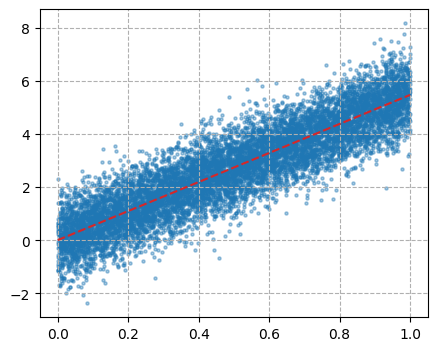

In [75]:
rng = np.random.RandomState(42)
n = 10000
x = rng.random(n)

a = float(stats.weibull_min(2, scale=8).rvs(1, random_state=rng)[0])
nu = float(stats.beta(.5, .5).rvs(1, random_state=rng)[0])

y = a * x + stats.norm(loc=0, scale=nu).rvs(x.shape, random_state=rng)


_, ax = plt.subplots(figsize=(5, 4))
ax.grid(ls='--')

sns.regplot(
    x=x,
    y=y,
    scatter_kws={
        's': 5,
        'alpha': .4,
    },
    line_kws={
        'ls': '--',
        'lw': 1.5,
        'color': 'tab:red',
    }
)

In [76]:
tensor = torch.stack([
    torch.from_numpy(x),
    torch.from_numpy(y)
])
tensor.cov()

tensor([[0.0827, 0.4526],
        [0.4526, 3.0922]], dtype=torch.float64)

In [77]:
tensor.var(axis=1)

tensor([0.0827, 3.0922], dtype=torch.float64)

In [78]:
cov_mat = tensor.cov()
cov_mat[0, 1] / cov_mat[0, 0]

tensor(5.4704, dtype=torch.float64)

In [79]:
a 

5.471855553702154